# Part 1 Exercise - Satellite Imagery Data Preparation



# Latihan Part 1 - Satellite Imagery Data Preparation



In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Colab_Notebooks/NOTEBOOKS_TUGAS_AKHIR/KOKUS_A/Group_AH/Database'

In [ ]:
train = dataset_root_folder + '/Train'
test = dataset_root_folder + '/Test'
val = dataset_root_folder + '/Validation'

In [ ]:
image_patch_size = 256

## Data Train

In [ ]:
train_image_dataset = []
train_center_dataset = []

for image_type in ['centerline','image']:
  if image_type == 'image':
    image_form ='image'

  elif image_type == 'centerline':
    image_form ='new_line'

  for image_id in range(1,161):
    image = cv2.imread(f'{train}/{image_type}/{image_form}{image_id}.bmp',1)
    if image is not None:
      if image_type == 'centerline':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
      image = np.array(image)
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          if image_type == 'image':
            individual_patched_image = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape)
            train_image_dataset.append(individual_patched_image)
          elif image_type == 'centerline':
            individual_patched_center = patched_images[i,j,:,:]
            individual_patched_center = individual_patched_center[0]
            train_center_dataset.append(individual_patched_center)
            #print(individual_patched_center)
            #print(individual_patched_center)


In [ ]:
print(len(train_image_dataset))

1166


In [ ]:
print(len(train_center_dataset))

1166


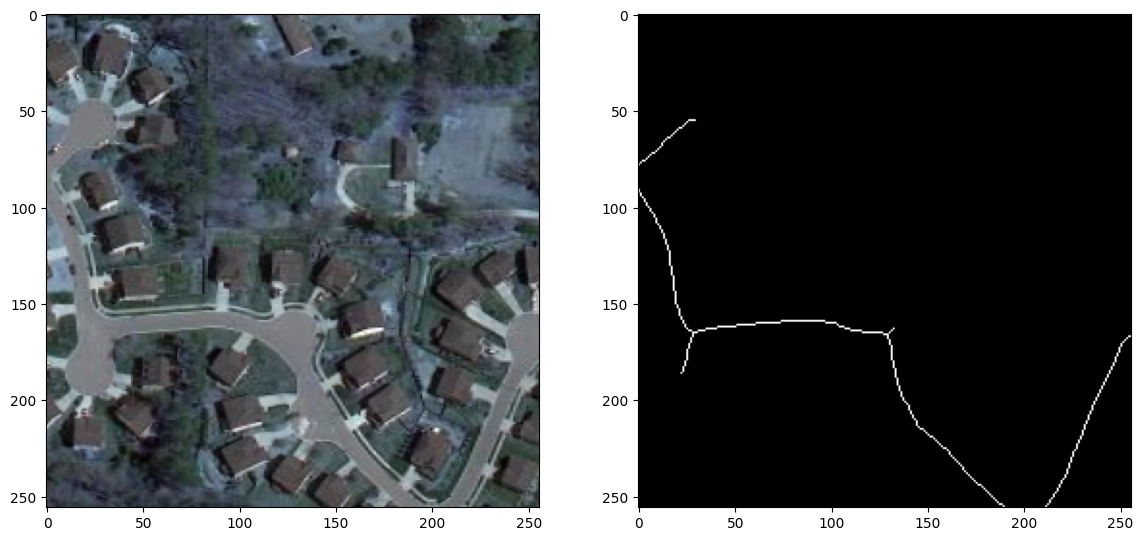

In [ ]:
train_image_dataset = np.array(train_image_dataset)
train_center_dataset = np.array(train_center_dataset)

random_image_id = random.randint(0, len(train_image_dataset))

plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(train_image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(train_center_dataset[random_image_id])

In [ ]:
print(f"Length of image_dataset after loading images: {len(train_image_dataset)}")
print(f"Length of image_dataset after patching: {len(train_center_dataset)}")

Length of image_dataset after loading images: 1166
Length of image_dataset after patching: 1166


## **labelling train**

In [ ]:
class_land = '#000000'  # Black color for land
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4)))
print(class_land)

class_road = '#FFFFFF'  # White color for road
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4)))
print(class_road)

[0 0 0]
[255 255 255]


In [ ]:
label = individual_patched_center

In [ ]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape[:2], dtype=np.uint8)
    road_pixels = np.all(label == class_road, axis=-1)
    label_segment[road_pixels] = 255  # Assign white color (255) to road pixels
    return label_segment

In [ ]:
labels = []
for i in range(train_center_dataset.shape[0]):
  label = rgb_to_label(train_center_dataset[i])
  labels.append(label)

In [ ]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [ ]:
np.unique(labels)

array([  0, 255], dtype=uint8)

In [ ]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [  0 255]


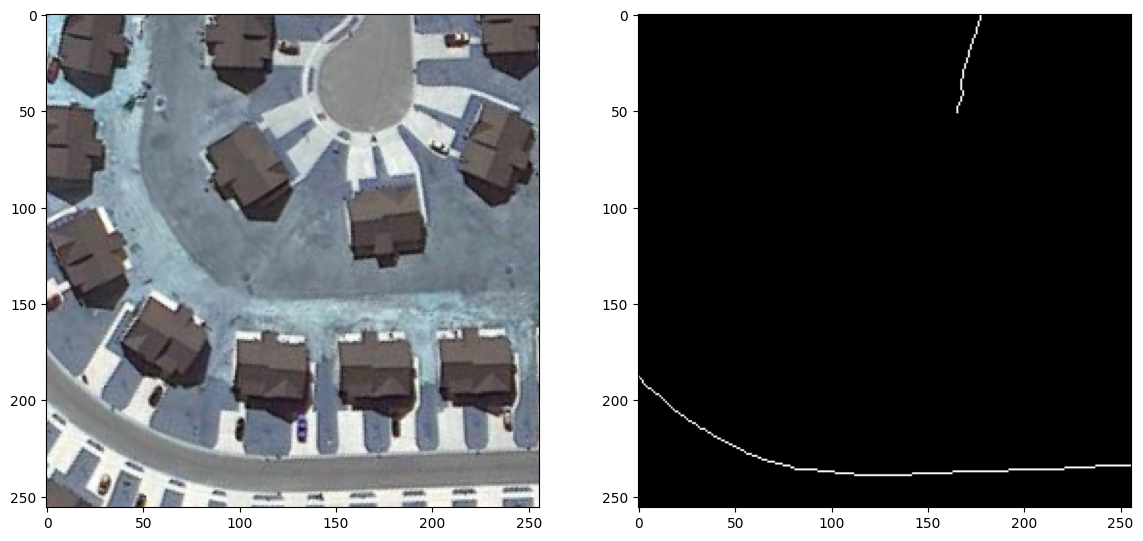

In [ ]:
random_image_id = random.randint(0, len(train_image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(train_image_dataset[random_image_id], cmap='gray')  # Plot image in grayscale
plt.subplot(122)
plt.imshow(labels[random_image_id][:,:,0], cmap='gray')  # Plot labels in grayscale
plt.show()

In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
total_classes

2

##**Data Test**

In [ ]:
test_image_dataset = []
test_center_dataset = []

for image_type in ['centerline','image']:
  if image_type == 'image':
    image_form ='image'

  elif image_type == 'centerline':
    image_form ='new_line'

  for image_id in range(181,225):
    image = cv2.imread(f'{test}/{image_type}/{image_form}{image_id}.bmp',1)
    if image is not None:
      if image_type == 'centerline':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
      image = np.array(image)
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          if image_type == 'image':
            individual_patched_image = patched_images[i,j,:,:]
            #print(individual_patched_image.shape)
            individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
            individual_patched_image = individual_patched_image[0]
            #print(individual_patched_image.shape)
            test_image_dataset.append(individual_patched_image)
          elif image_type == 'centerline':
            individual_patched_center = patched_images[i,j,:,:]
            individual_patched_center = individual_patched_center[0]
            test_center_dataset.append(individual_patched_center)
            #print(individual_patched_center2)


In [ ]:
print(len(test_image_dataset))

373


In [ ]:
print(len(test_center_dataset))

373


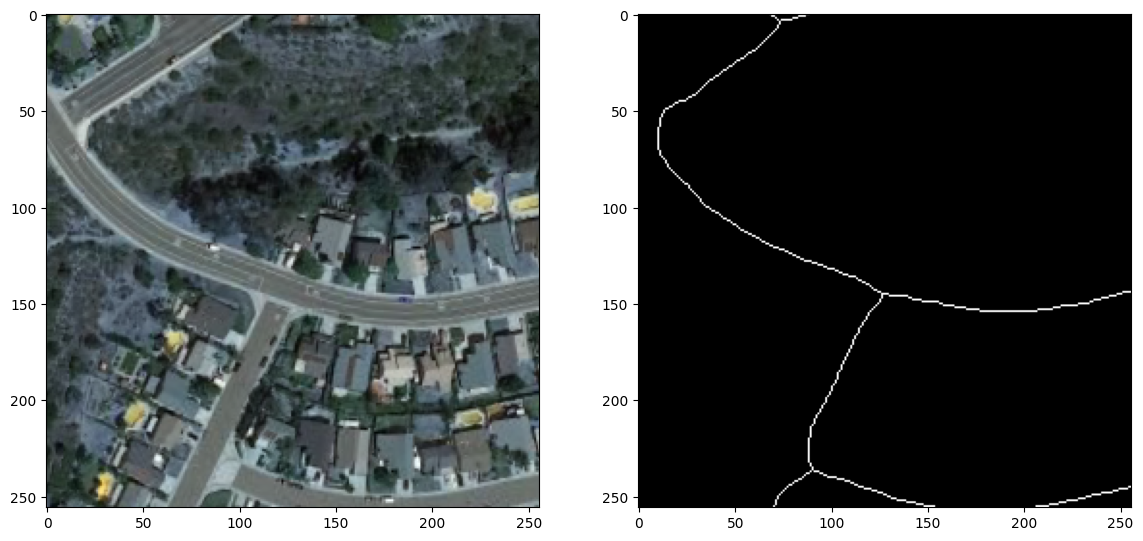

In [ ]:
test_image_dataset = np.array(test_image_dataset)
test_center_dataset = np.array(test_center_dataset)

random_image_id = random.randint(0, len(test_image_dataset))

plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(test_image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(test_center_dataset[random_image_id])

In [ ]:
print(f"Length of image_dataset after loading images: {len(test_image_dataset)}")
print(f"Length of image_dataset after patching: {len(test_center_dataset)}")

Length of image_dataset after loading images: 373
Length of image_dataset after patching: 373


## **Labelling Test**

In [ ]:
class_land = '#000000'  # Black color for land
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4)))
print(class_land)

class_road = '#FFFFFF'  # White color for road
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4)))
print(class_road)

[0 0 0]
[255 255 255]


In [ ]:
label_test = individual_patched_center

In [ ]:
def rgb_to_label_test(label_test):
    label_segment = np.zeros(label_test.shape[:2], dtype=np.uint8)
    road_pixels = np.all(label_test == class_road, axis=-1)
    label_segment[road_pixels] = 255  # Assign white color (255) to road pixels
    return label_segment

In [ ]:
labels_test = []
for i in range(test_center_dataset.shape[0]):
  label_test = rgb_to_label_test(test_center_dataset[i])
  labels_test.append(label_test)

In [ ]:
labels_test = np.array(labels_test)
labels_test = np.expand_dims(labels_test, axis=3)

In [ ]:

np.unique(labels_test)

array([  0, 255], dtype=uint8)

In [ ]:
print("Total unique labels based on masks: ",format(np.unique(labels_test)))

Total unique labels based on masks:  [  0 255]


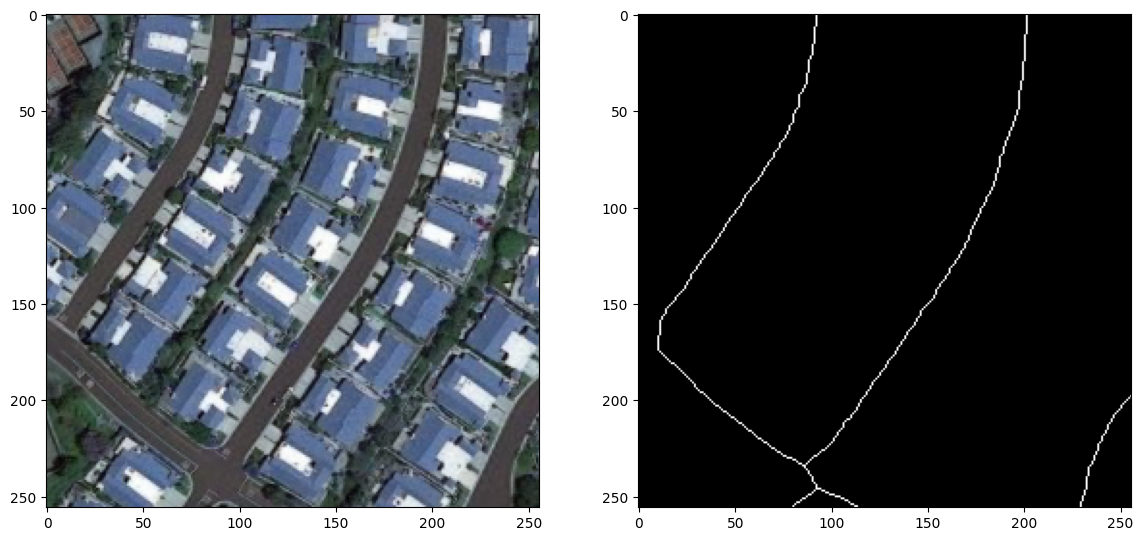

In [ ]:
random_image_id = random.randint(0, len(test_image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(test_image_dataset[random_image_id], cmap='gray')  # Plot image in grayscale
plt.subplot(122)
plt.imshow(labels_test[random_image_id][:,:,0], cmap='gray')  # Plot labels in grayscale
plt.show()

In [ ]:

total_test_classes = len(np.unique(labels))

In [ ]:
np.max(labels)

255

In [ ]:
total_test_classes

2

## Modelling


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# Define the number of classes
total_classes = 2  # Assuming you have 2 classes: road and land
total_test_classes = 2  # Assuming you have 2 classes: road and land

# Convert labels to categorical
labels_categorical_dataset = to_categorical(np.minimum(labels, total_classes - 1), num_classes=total_classes)
labels_categorical_dataset_test = to_categorical(np.minimum(labels_test, total_test_classes - 1), num_classes=total_test_classes)

In [ ]:
master_test_dataset = test_image_dataset
master_training_dataset = train_image_dataset

In [ ]:
X_train = train_image_dataset
y_train = labels_categorical_dataset
X_test = test_image_dataset
y_test = labels_categorical_dataset_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1166, 256, 256, 3)
(373, 256, 256, 3)
(1166, 256, 256, 2)
(373, 256, 256, 2)


In [ ]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


## Coding for Part 2: Deep Learning with Satellite Imagery Data

In [ ]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
# Please uncomment this line to get model confiuration
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   

## Generating Loss Function

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [ ]:
#weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
#weights = [0.1666, 0.1666, 0.1666]
weights =[0.1666, 0.1666]

In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [ ]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()


In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
# Fit the model
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=50,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/50
73/73 [==============================] - 43s 259ms/step - loss: 0.9222 - accuracy: 0.9824 - jaccard_coef: 0.8884 - val_loss: 0.9201 - val_accuracy: 0.9916 - val_jaccard_coef: 0.9467
Epoch 2/50
73/73 [==============================] - 13s 185ms/step - loss: 0.9154 - accuracy: 0.9921 - jaccard_coef: 0.9228 - val_loss: 0.9166 - val_accuracy: 0.9916 - val_jaccard_coef: 0.9397
Epoch 3/50
73/73 [==============================] - 14s 186ms/step - loss: 0.9128 - accuracy: 0.9920 - jaccard_coef: 0.9334 - val_loss: 0.9169 - val_accuracy: 0.9905 - val_jaccard_coef: 0.9386
Epoch 4/50
73/73 [==============================] - 14s 187ms/step - loss: 0.9081 - accuracy: 0.9867 - jaccard_coef: 0.9531 - val_loss: 0.9173 - val_accuracy: 0.9886 - val_jaccard_coef: 0.9728
Epoch 5/50
73/73 [==============================] - 14s 188ms/step - loss: 0.9017 - accuracy: 0.9851 - jaccard_coef: 0.9648 - val_loss: 0.9124 - val_accuracy: 0.9854 - val_jaccard_coef: 0.9692
Epoch 6/50
73/73 [=================

In [ ]:
history_a = model_history

In [ ]:
history_a.history

{'loss': [0.9222041368484497,
  0.9154178500175476,
  0.9127634763717651,
  0.9081302881240845,
  0.9016894102096558,
  0.8977794051170349,
  0.8953973650932312,
  0.8936604261398315,
  0.8918951153755188,
  0.8898993730545044,
  0.889261782169342,
  0.8879465460777283,
  0.8877119421958923,
  0.8871497511863708,
  0.8862342238426208,
  0.8859701156616211,
  0.8854604363441467,
  0.8847440481185913,
  0.8843852877616882,
  0.8841214776039124,
  0.8837704062461853,
  0.883110761642456,
  0.8826883435249329,
  0.8822389245033264,
  0.8819195032119751,
  0.8815289735794067,
  0.8810038566589355,
  0.8807026743888855,
  0.8806473612785339,
  0.8801587820053101,
  0.8799797296524048,
  0.8798986077308655,
  0.8797545433044434,
  0.8796579241752625,
  0.8791725635528564,
  0.8792831301689148,
  0.8788347244262695,
  0.8785938620567322,
  0.8784474730491638,
  0.8781440854072571,
  0.8777019381523132,
  0.8773193359375,
  0.877727746963501,
  0.8772433996200562,
  0.8772033452987671,
  0.8771

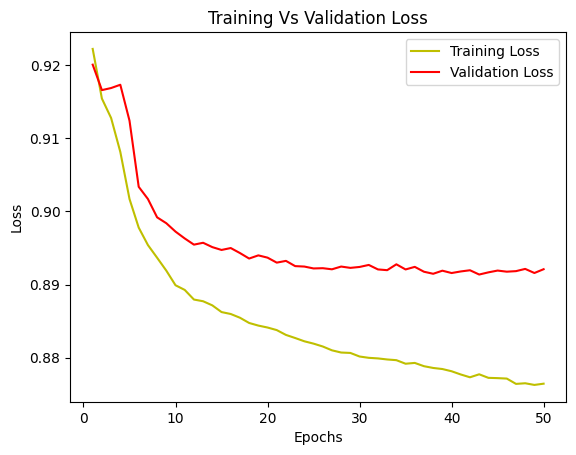

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

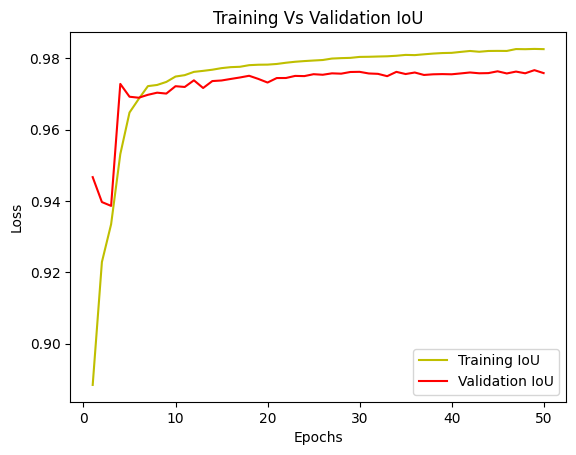

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [ ]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 73}

In [ ]:
y_pred = model.predict(X_test)

12/12 [==============================] - 5s 227ms/step


In [ ]:
len(y_pred)

373

In [ ]:
y_pred

array([[[[9.93942678e-01, 6.05731271e-03],
         [9.98201609e-01, 1.79831765e-03],
         [9.98671174e-01, 1.32881314e-03],
         ...,
         [9.99790609e-01, 2.09369202e-04],
         [9.99552071e-01, 4.47867933e-04],
         [9.95178103e-01, 4.82191052e-03]],

        [[9.99185026e-01, 8.14920117e-04],
         [9.99813378e-01, 1.86635152e-04],
         [9.99833584e-01, 1.66410478e-04],
         ...,
         [9.99972582e-01, 2.74513186e-05],
         [9.99951124e-01, 4.88160513e-05],
         [9.99400377e-01, 5.99567837e-04]],

        [[9.99442160e-01, 5.57825027e-04],
         [9.99822676e-01, 1.77380294e-04],
         [9.99880314e-01, 1.19621945e-04],
         ...,
         [9.99976993e-01, 2.29667658e-05],
         [9.99972701e-01, 2.72598609e-05],
         [9.99717891e-01, 2.82106950e-04]],

        ...,

        [[9.99638796e-01, 3.61200742e-04],
         [9.99949694e-01, 5.02754920e-05],
         [9.99988317e-01, 1.16323645e-05],
         ...,
         [9.99923229e

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
len(y_pred_argmax)

373

In [ ]:
y_pred_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test_argmax = np.argmax(y_test, axis=3)

In [ ]:
y_test_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Comparing prediction results
-  using test images using mask images and predicted result images..

In [ ]:
import random


In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 483ms/step


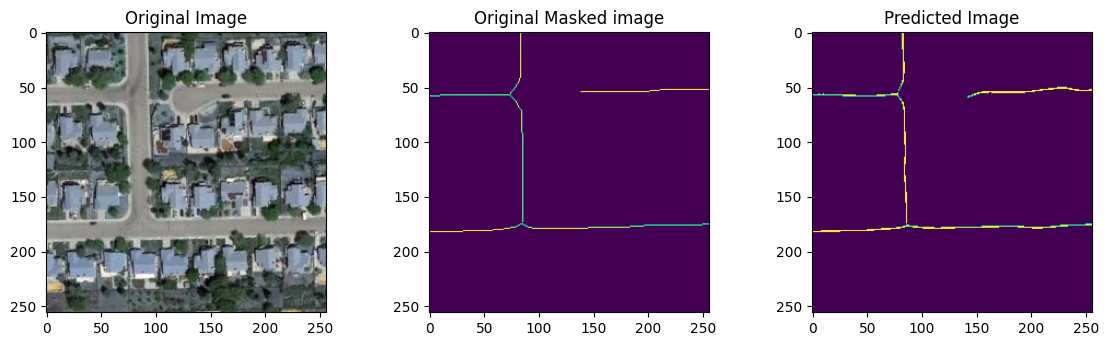

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [ ]:
model.save("satellite_segmentation_full.h5")

In [ ]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Jun 22 14:18 .
drwxr-xr-x 1 root root 4.0K Jun 22 13:59 ..
drwxr-xr-x 4 root root 4.0K Jun 20 13:38 .config
drwx------ 5 root root 4.0K Jun 22 14:00 drive
drwxr-xr-x 1 root root 4.0K Jun 20 13:39 sample_data
-rw-r--r-- 1 root root  23M Jun 22 14:18 satellite_segmentation_full.h5
